# Financial Data and Preprocessing
## Getting data from Yahoo Finance
- use `pandas_datareader` to grasp data from FRED, World Bank
- use `yfinance` library
- References yfinance python tutorial: https://analyzingalpha.com/yfinance-python


In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import pandas as pd
import yfinance as yf

In [3]:
ApplePrice=yf.download('AAPL',start='2000-01-01',end='2020-12-31',progress=False) #progress=False to disables the progress bar.

In [4]:
ApplePrice.head()

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.850643  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.778926  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.790324  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.721931  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.756128  460734400

### Get data from Quandl
- quandl guide: https://algotrading101.com/learn/quandl-guide/

In [5]:
!pip install Quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import quandl
QUANDL_KEY='-zPmjRGtfXDAyZ3iJJhz'
quandl.ApiConfig.api_key=QUANDL_KEY

In [7]:
# with WIKI prices database
AAPL=quandl.get(dataset='WIKI/AAPL', start_date='2000-01-01',end='2020-12-31') #collapse: frequency

In [8]:
AAPL.head()

Open    High     Low   Close     Volume  Ex-Dividend  \
Date                                                                 
2000-01-03  104.87  112.50  101.69  111.94  4783900.0          0.0   
2000-01-04  108.25  110.62  101.19  102.50  4574800.0          0.0   
2000-01-05  103.75  110.56  103.00  104.00  6949300.0          0.0   
2000-01-06  106.12  107.00   95.00   95.00  6856900.0          0.0   
2000-01-07   96.50  101.00   95.50   99.50  4113700.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2000-01-03          1.0   3.369314   3.614454  3.267146    3.596463   
2000-01-04          1.0   3.477908   3.554053  3.251081    3.293170   
2000-01-05          1.0   3.333330   3.552125  3.309234    3.341362   
2000-01-06          1.0   3.409475   3.437748  3.052206    3.052206   
2000-01-07          1.0   3.100399   3.244977  3.068270    3.196784   

            Adj. Volume  
Date                     
2000-01-03  133949200.0  
2000-01-04  128094400.0  
2000-01-05  194580400.0  
2000-01-06  191993200.0  
2000-01-07  115183600.0

### Converting Prices to Returns
- Types of returns
  - Simple returns: $R_t=\frac{P_t-P_{t-1}}{P_{t-1}}$
  - Log returns: $R_t=log(P_t/P_{t-1})=log(P_t)-log(P_{t-1})$
    - continuously compounded return

In [9]:
import numpy as np

In [10]:
#keep the closed price only
ApplePrice=ApplePrice.loc[:,['Adj Close']]
ApplePrice.rename(columns={'Adj Close':'adj_close'},inplace=True)

In [11]:
#calculate the simple and log returns
ApplePrice['simpleReturn']=ApplePrice.adj_close.pct_change() # calculates the percentage change between the current and prior element
ApplePrice['logReturn']=np.log(ApplePrice.adj_close/ApplePrice.adj_close.shift(1))

In [12]:
ApplePrice.head()

adj_close  simpleReturn  logReturn
Date                                          
2000-01-03   0.850643           NaN        NaN
2000-01-04   0.778926     -0.084310  -0.088078
2000-01-05   0.790324      0.014633   0.014527
2000-01-06   0.721931     -0.086538  -0.090514
2000-01-07   0.756128      0.047369   0.046281

### Calculate the Inflation Rate and Real Return
- Inflation: CPI $R_t^r=\frac{1+R_t}{1+π_t}-1$
  - $R_t$: simple return
  - $π_t$: inflation rate

In [13]:
#join the datetime with adj_close
allDates=pd.DataFrame(index=pd.date_range(start='1999-12-31',end='2020-12-31'))
AppleInflation=allDates.join(ApplePrice[['adj_close']],how='left').fillna(method='ffill').asfreq('M') 
#ffill:the last day of the month was not a trading day, we used the last known price of that month
#select the end-of-month rows only

In [14]:
AppleInflation.head()

adj_close
1999-12-31        NaN
2000-01-31   0.788424
2000-02-29   0.871067
2000-03-31   1.032077
2000-04-30   0.942785

In [15]:
#get inflation data from Quandl
cpi=quandl.get(dataset='RATEINF/CPI_USA',start_date='1999-12-01',end_date='2010-12-31')
cpi.rename(columns={'Value':'cpi'},inplace=True)

In [16]:
cpi.head()

cpi
Date             
1999-12-31  168.3
2000-01-31  168.8
2000-02-29  169.8
2000-03-31  171.2
2000-04-30  171.3

In [17]:
#merge inflation data with prices
merge=AppleInflation.join(cpi,how='left')

In [18]:
#calculate the inflation rate with simple return
merge['simple_return']=merge.adj_close.pct_change()
merge['inflation_rate']=merge.cpi.pct_change()

In [19]:
#adjust returns for inflation
merge['real_return']=(merge.simple_return+1)/(merge.inflation_rate+1)-1
merge.head()

adj_close    cpi  simple_return  inflation_rate  real_return
1999-12-31        NaN  168.3            NaN             NaN          NaN
2000-01-31   0.788424  168.8            NaN        0.002971          NaN
2000-02-29   0.871067  169.8       0.104820        0.005924     0.098313
2000-03-31   1.032077  171.2       0.184842        0.008245     0.175153
2000-04-30   0.942785  171.3      -0.086517        0.000584    -0.087050

### Another Financial Resources: 
- Tushare
- Intrinio Python SDK: https://github.com/intrinio/python-sdk. We can download already calculated financial indicator from it, such as MACD.
- iexfinance
- tiingo
- alpha_vantage

## Changing Frequency
- multiply or divide the `log returns` by the number of time periods
- multiply or divide the `volatility` by the `square root` of the number of time periods
  - Realized Volatility: $RV=\sqrt[2]{\sum_{i=1}^Tr_t^2}$
    - annualized by `daily realized variance*numbers of trading days/weeks/months in a year`

In [20]:
#we have already got AAPL log return above
#calculate the realized volatility
def realized_volatility(x):
  return np.sqrt(np.sum(x**2))

In [21]:
#get monthly realized volatility
dfRV=ApplePrice.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
dfRV.rename(columns={'logReturn':'RV'},inplace=True)

In [22]:
dfRV.head()

adj_close  simpleReturn        RV
Date                                         
2000-01-31   3.520673      0.235272  0.236246
2000-02-29   3.798178      0.149058  0.147841
2000-03-31   4.692970      0.249920  0.243592
2000-04-30   4.083196      0.213318  0.212513
2000-05-31   3.616428      0.181834  0.184990

In [23]:
#only keep RV and Date columns
dfRV=dfRV.drop(columns=['simpleReturn','adj_close'])

In [24]:
dfRV.head()

RV
Date                
2000-01-31  0.236246
2000-02-29  0.147841
2000-03-31  0.243592
2000-04-30  0.212513
2000-05-31  0.184990

In [25]:
ApplePrice=ApplePrice.drop(columns=['simpleReturn','adj_close'])
ApplePrice.head()

logReturn
Date                 
2000-01-03        NaN
2000-01-04  -0.088078
2000-01-05   0.014527
2000-01-06  -0.090514
2000-01-07   0.046281

In [26]:
#annualize the values
dfRV.RV=dfRV.RV* np.sqrt(12)

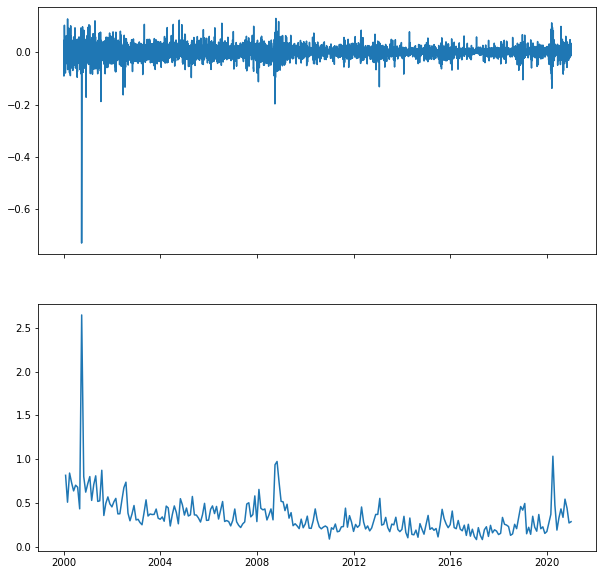

In [27]:
#plot the results
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, sharex=True,figsize=(10,10))
ax[0].plot(ApplePrice)
ax[1].plot(dfRV)
plt.show()

## Visualizing Time Series Data
- with default plot of pandas dataframe
- plotly + cufflinks

In [28]:
!pip install plotly
!pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.7 MB/s eta 0:00:00


In [29]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [30]:
MSFT=yf.download('MSFT',auto_adjust=False,progress=False)
MSFT=MSFT.loc[:,['Adj Close']]
MSFT.rename(columns={'Adj Close':'adj_close'},inplace=True)

In [31]:
MSFT.head()

adj_close
Date                 
1986-03-13   0.060657
1986-03-14   0.062823
1986-03-17   0.063907
1986-03-18   0.062281
1986-03-19   0.061198

In [32]:
#get simple and log returns
MSFT['simple_return']=MSFT.adj_close.pct_change()
MSFT['log_return']=np.log(MSFT.adj_close/MSFT.adj_close.shift(1))

In [33]:
#drop NA for the first row
MSFT.dropna(how='any',inplace=True)

#### Plot with Pandas

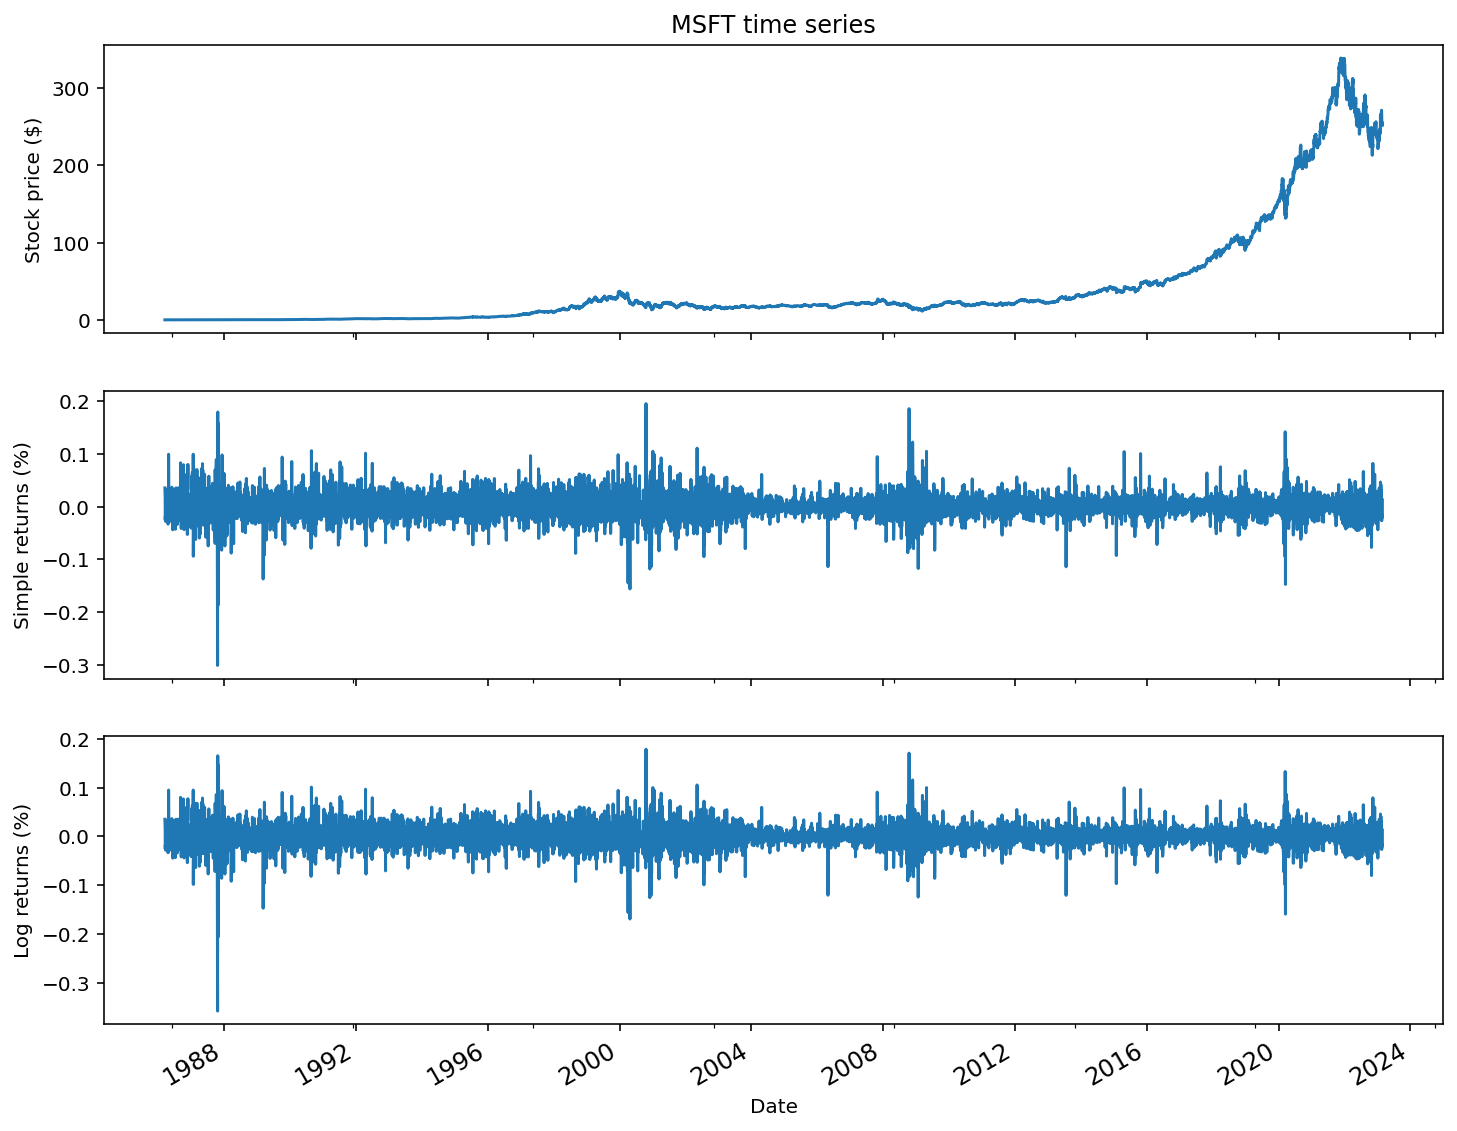

In [34]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
# add prices
MSFT.adj_close.plot(ax=ax[0])
ax[0].set(title = 'MSFT time series',
         ylabel = 'Stock price ($)')
# add simple returns 
MSFT.simple_return.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')
# add log returns 
MSFT.log_return.plot(ax=ax[2])
ax[2].set(xlabel = 'Date', 
         ylabel = 'Log returns (%)')

ax[2].tick_params(axis='x',
                 which='major',
                 labelsize=12)

# plt.tight_layout()
plt.show()

Plotly+Cufflinks
- use `nbviewer` to check.
- reference: https://plotly.com/python/getting-started/

In [35]:
import cufflinks as cf 
from plotly.offline import iplot, init_notebook_mode

In [36]:
#initialize notebook display
init_notebook_mode()

In [37]:
cf.go_offline()
cf.set_config_file(offline=True, world_readable=True)

In [38]:
#create the plots
cf.set_config_file(world_readable=True, theme='pearl',offline=True)
MSFT.iplot(subplots=True, shape=(3,1), shared_xaxes=True, title='MSFT time series')

## Identify Outliers
- `Three sigma approach`, and mark them in the plot.
  - Outlier range: $x>\mu+3σ$ and $x<\mu-3σ$
  - For average, we can use <u>moving average or weighted moving average</u>
  - use **21** as the average number of trading days per month.We firstly use daily data.


In [39]:
#convert price to returns
AAPLP=yf.download('AAPL',start='2000-01-01',end='2020-12-31',progress=False)
AAPLP=AAPLP.loc[:,['Adj Close']]
AAPLP.rename(columns={'Adj Close':'adj_close'},inplace=True)
AAPLP['simple_return']=AAPLP.adj_close.pct_change()

In [40]:
AAPLP.head()

adj_close  simple_return
Date                                
2000-01-03   0.850643            NaN
2000-01-04   0.778926      -0.084310
2000-01-05   0.790324       0.014633
2000-01-06   0.721931      -0.086538
2000-01-07   0.756127       0.047369

In [41]:
#calculate the rolling mean and std
rolling=AAPLP[['simple_return']].rolling(window=21).agg(['mean','std'])
rolling.columns=rolling.columns.droplevel() #return dataframe with requested column level removed

In [42]:
#join the rolling matrices to the original data
dfoutliers=AAPLP.join(rolling)

In [43]:
dfoutliers.head()

adj_close  simple_return  mean  std
Date                                           
2000-01-03   0.850643            NaN   NaN  NaN
2000-01-04   0.778926      -0.084310   NaN  NaN
2000-01-05   0.790324       0.014633   NaN  NaN
2000-01-06   0.721931      -0.086538   NaN  NaN
2000-01-07   0.756127       0.047369   NaN  NaN

In [44]:
#define a function to detect outliers
def outlier_identify(row,n_sigmas=3):
  x=row['simple_return']
  mu=row['mean']
  sigma=row['std']

  if(x>mu+3*sigma)|(x<mu-3*sigma):
    return 1
  else:
    return 0

In [45]:
#identify the outliers and extract the values for later use
#apply the pre-defined function
dfoutliers['outlier'] = dfoutliers.apply(outlier_identify, axis=1)
#store the outlier values into a new variable
outliers = dfoutliers.loc[dfoutliers['outlier'] == 1, ['simple_return']]

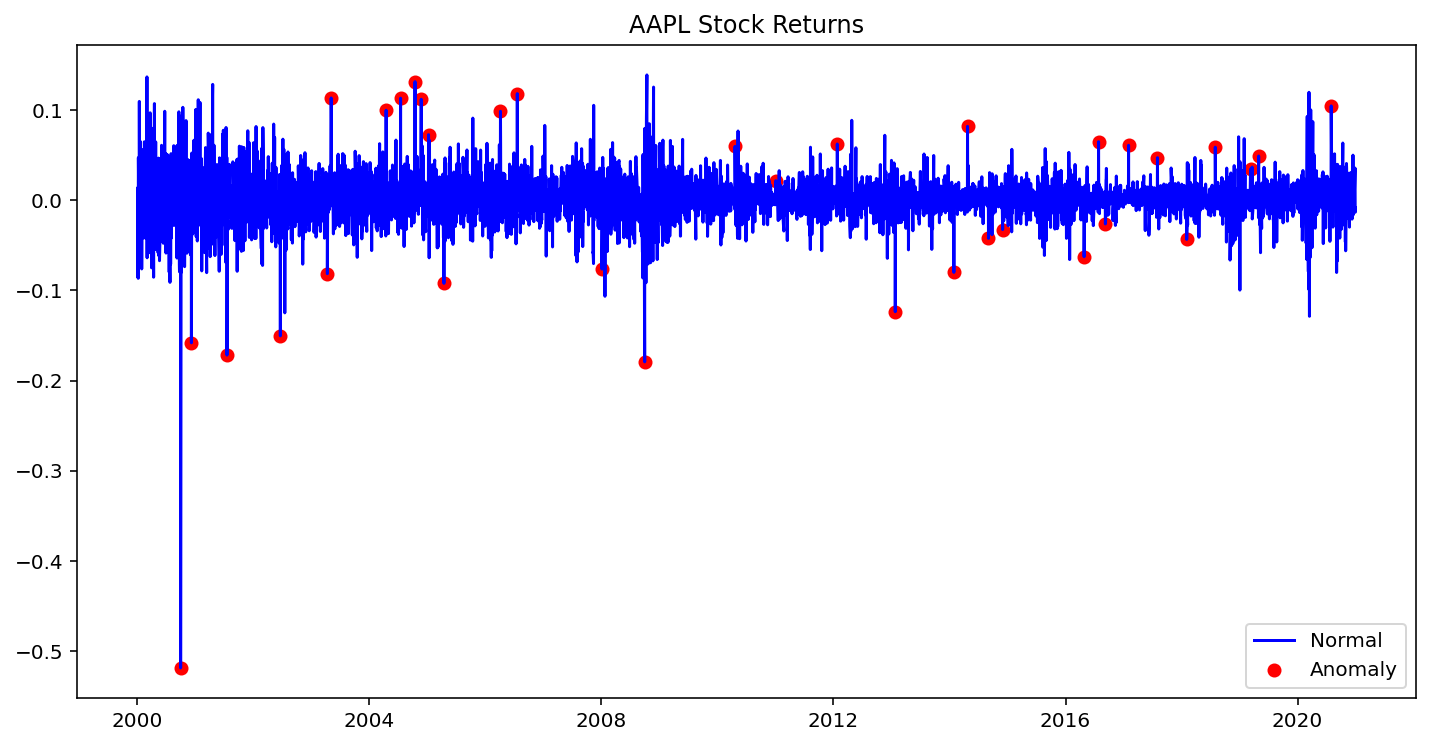

In [46]:
#mark the outliers in the graph
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(dfoutliers.index, dfoutliers.simple_return, color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_return, color='red', label='Anomaly')
ax.set_title("AAPL Stock Returns")
ax.legend(loc='lower right')
plt.show()

## Investigating Statistical Features of Asset Returns
- reference for scipy: https://docs.scipy.org/doc/scipy/reference/stats.html


In [47]:
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [48]:
#download S&P500 data and calculate the log return
SP500= yf.download('^GSPC', start='1985-01-01', end='2018-12-31',progress=False)

SP500 = SP500[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
SP500['log_return'] = np.log(SP500.adj_close/SP500.adj_close.shift(1))
SP500 = SP500[['adj_close', 'log_return']].dropna(how = 'any')

In [49]:
SP500.head()

adj_close  log_return
Date                              
1985-01-03  164.570007   -0.004849
1985-01-04  163.679993   -0.005423
1985-01-07  164.240005    0.003416
1985-01-08  163.990005   -0.001523
1985-01-09  165.179993    0.007230

### Non-Normal Distribution of Returns
- Histogram
- Q-QPlot: compared two distributions(actual and theoretical normal distribution) by plotting their `quantiles` against each other. 
- Summary Statistics

In [50]:
#calculate the normal pdf using mean and std
return_range=np.linspace(min(SP500.log_return),max(SP500.log_return),num=1000) #select numbers of point =1000, get them smoothly in line.
mu=SP500.log_return.mean()
sigma=SP500.log_return.std()
norm_pdf=scs.norm.pdf(return_range,loc=mu,scale=sigma) #calculate the pdf

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



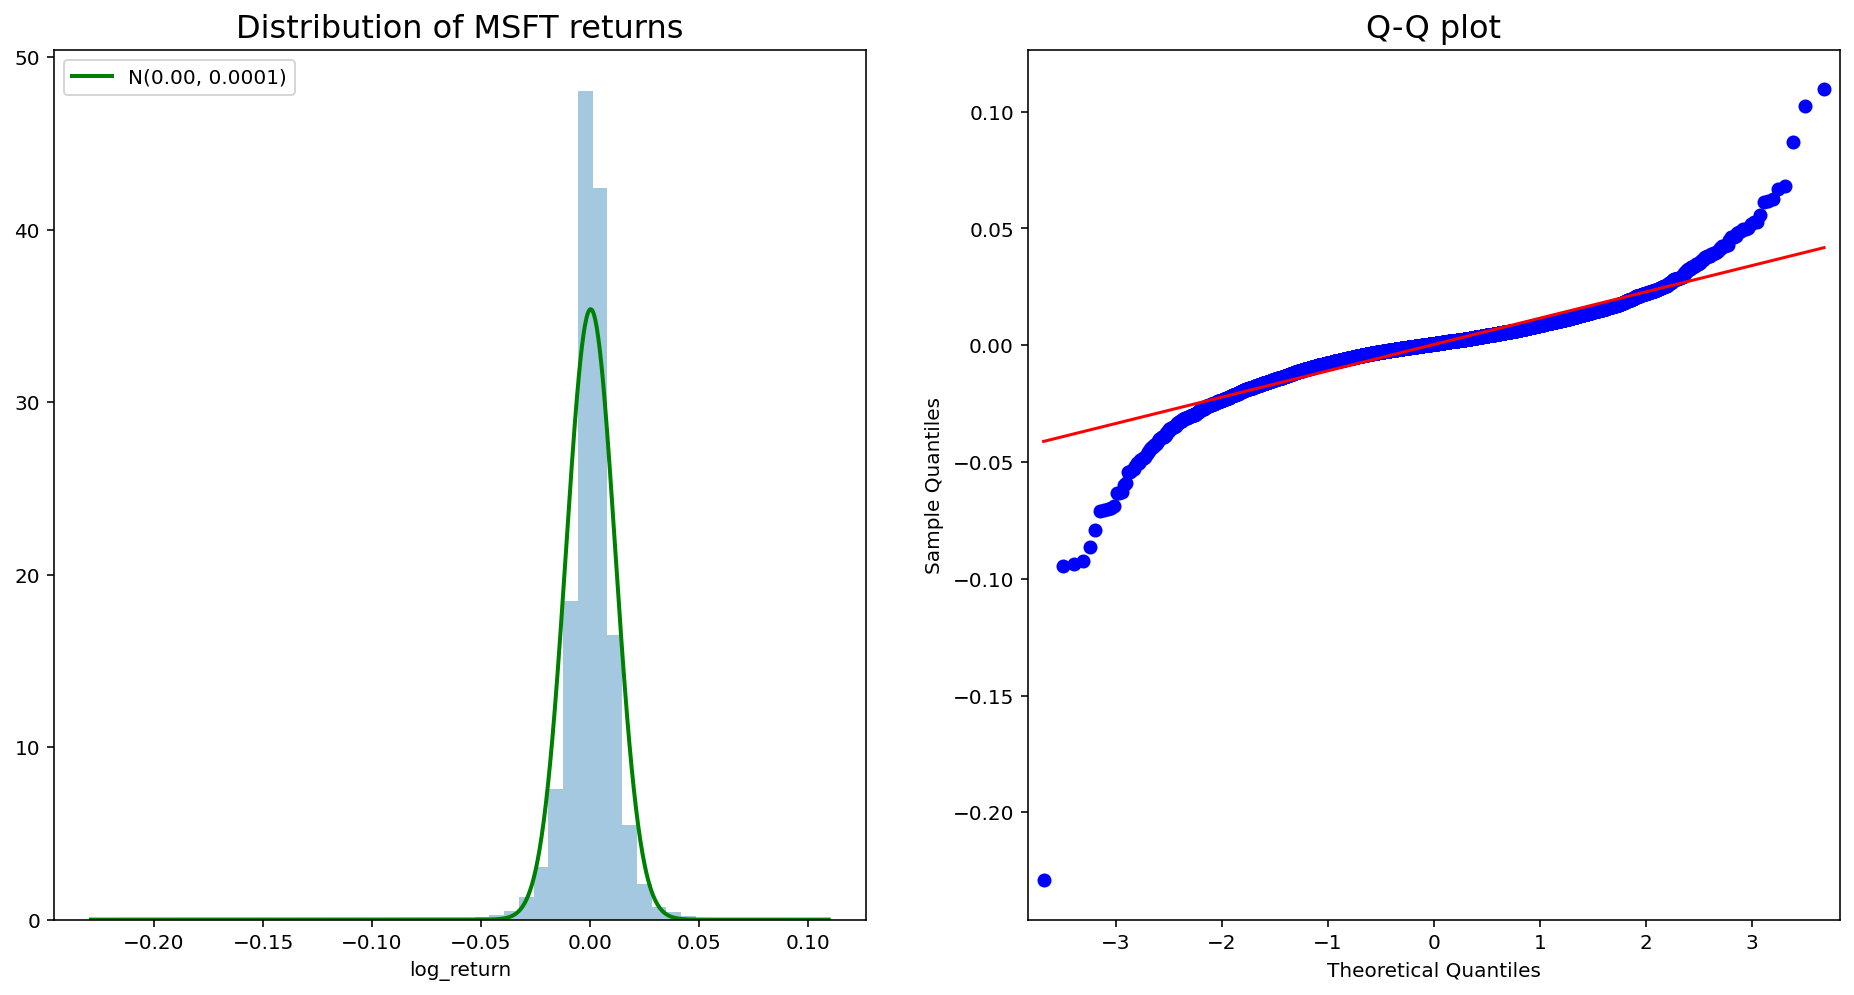

In [58]:
#plot in histgram and Quantile-Quantile Plot to assess the normality of the log returns
fig,ax=plt.subplots(1,2,figsize=(16,8))
sns.distplot(SP500.log_return, kde=False, norm_hist=True,ax=ax[0])
ax[0].set_title('Distribution of returns', fontsize=16) 
ax[0].plot(return_range, norm_pdf,'g', lw=2,label=f'N({mu:.2f}, {sigma**2:.4f})')   
ax[0].legend(loc='upper left')

qq = sm.qqplot(SP500.log_return.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)
plt.show()

- From Q-Q Plot, not all the quantiles sit on the theoretical red line.
- The left tail of the returns distribution is heavier than that of the Gaussian distribution.

In [61]:
#print the summary statistics of log return
#a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution at 99% CI.
JarqueBera_test = scs.jarque_bera(SP500.log_return.values)
print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(SP500.index.date), '-', max(SP500.index.date))
print('Number of observations:', SP500.shape[0])
print(f'Mean: {SP500.log_return.mean():.4f}')
print(f'Median: {SP500.log_return.median():.4f}')
print(f'Min: {SP500.log_return.min():.4f}')
print(f'Max: {SP500.log_return.max():.4f}')
print(f'Standard Deviation: {SP500.log_return.std():.4f}')
print(f'Skewness: {SP500.log_return.skew():.4f}')
print(f'Kurtosis: {SP500.log_return.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {JarqueBera_test[0]:.2f} with p-value: {JarqueBera_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates: 1985-01-03 - 2018-12-28
Number of observations: 8568
Mean: 0.0003
Median: 0.0006
Min: -0.2290
Max: 0.1096
Standard Deviation: 0.0113
Skewness: -1.2628
Kurtosis: 28.0156
Jarque-Bera statistic: 282134.38 with p-value: 0.00


##### Facts:
1. Negative skewness:large negative returns occur more often than large positive returns.
2. Excess kurtosis: larger and smaller returns occur more often than expected.

Returns do not follow a Gaussian distribution.

### Volatility Clustering
- large changes in price tend to be followed by large changes
- small changes tend to be followed by small changes

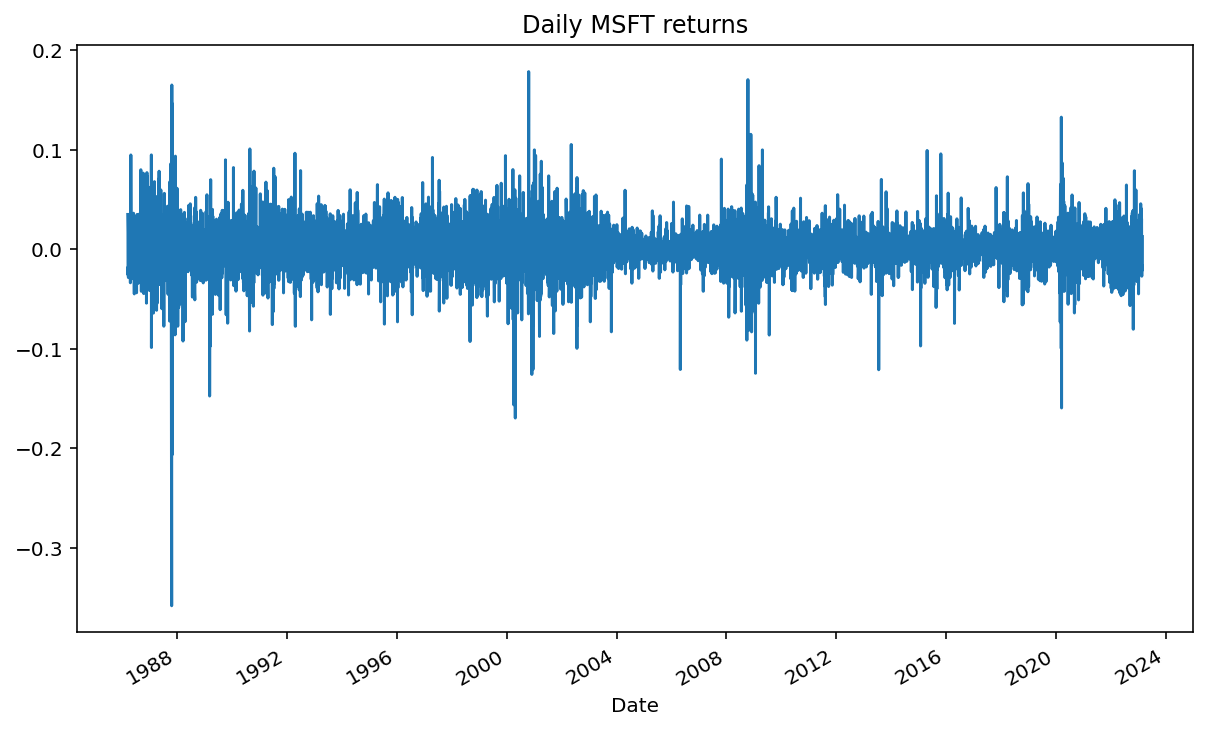

In [62]:
#visualize the log return series with pandas df
MSFT.log_return.plot(title='Daily MSFT returns', figsize=(10, 6))
plt.show()

Check the periods of higher positive and negative returns.

### Absense of Autocorrelation in Returns
- Autocorrelation: the degree of correlation of a variable's values over time.
- Values outside of CI can be considered statistically significant.

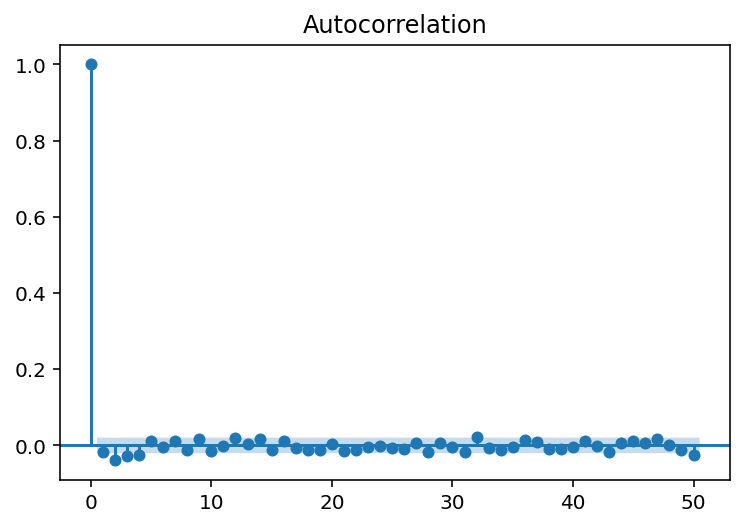

In [63]:
n_lags=50
alpha=0.05
#autocorrelation function: ACF of log returns
acf=smt.graphics.plot_acf(MSFT.log_return,lags=n_lags,alpha=alpha)
plt.show()

Only few values lie out of the confidence interval(0.95). In summary, there is no autocorrelation in the log returns series.

### Small and Decreasing Autocorrelation in Squared/Absolute Returns

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

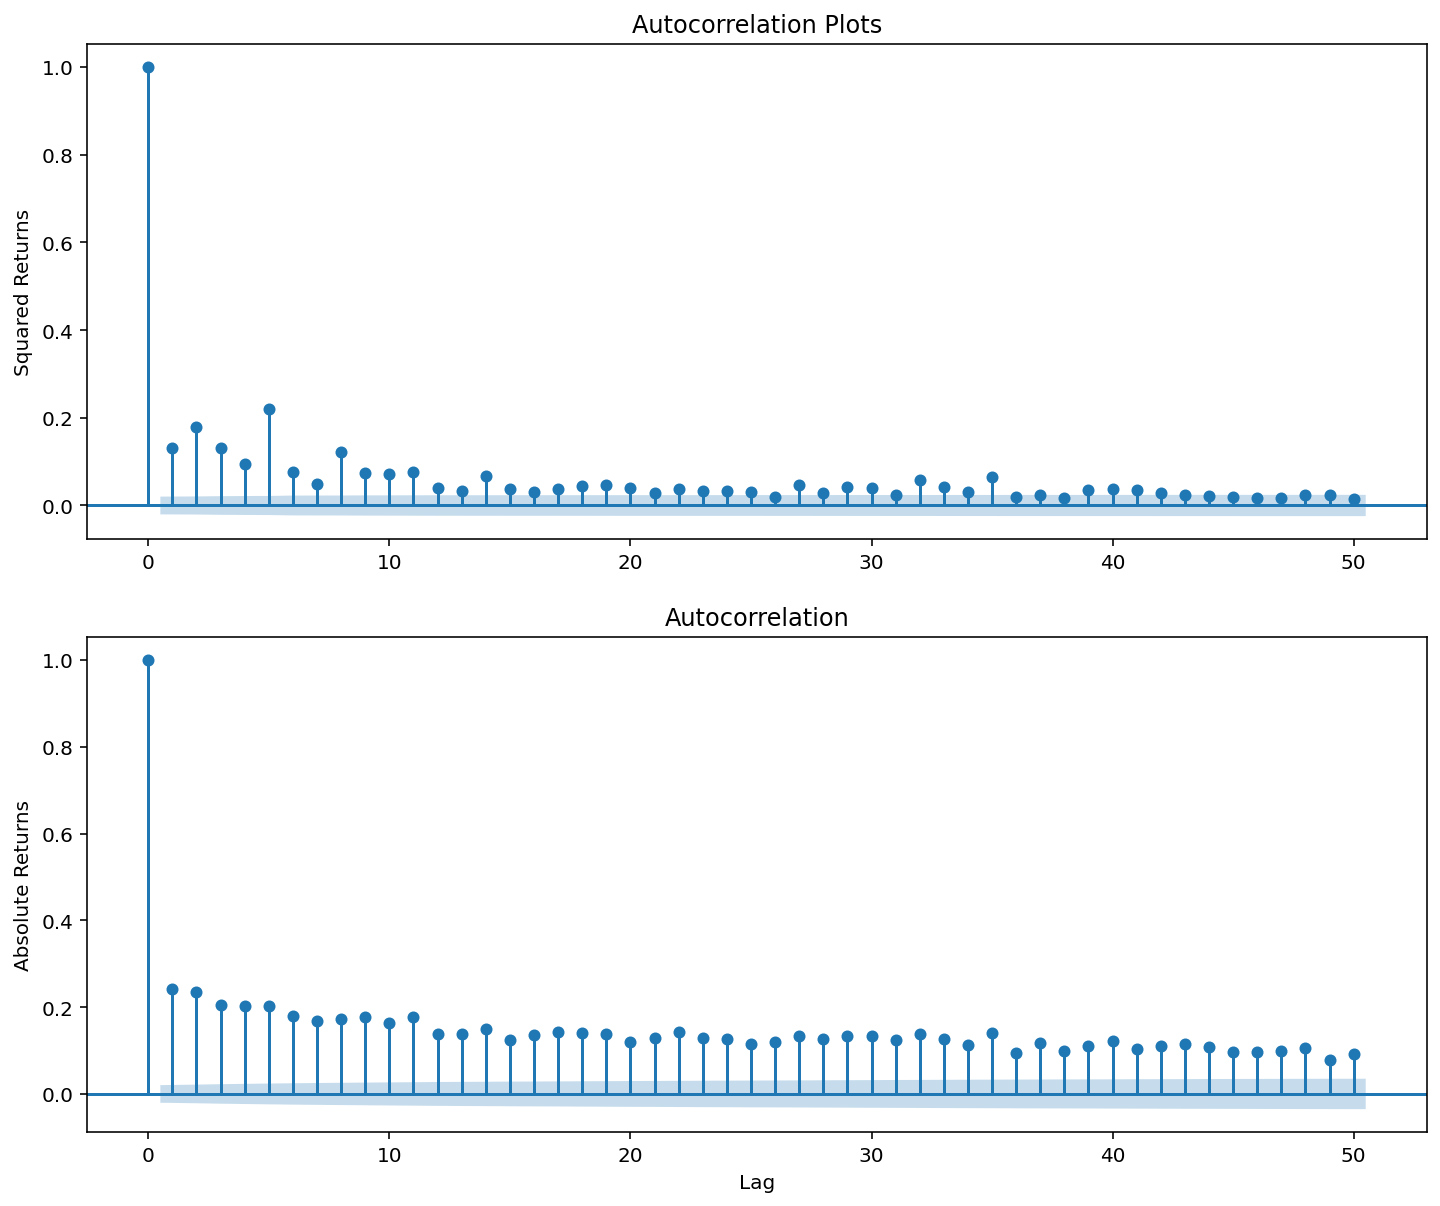

In [64]:
#creating the ACF plots of squared and absolute returns.
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
#squared returns
smt.graphics.plot_acf(MSFT.log_return ** 2, lags=n_lags, alpha=alpha, ax = ax[0])
ax[0].set(title='Autocorrelation Plots', ylabel='Squared Returns')
#log returns
smt.graphics.plot_acf(np.abs(MSFT.log_return), lags=n_lags, alpha=alpha, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',xlabel='Lag')

### Leverage effect
- Definition: A negative relationship between return and future
volatility.
- increased leverage ratio that arises from a drop
in the share price for a firm.

In [65]:
#Calculate volatility measures as std:
MSFT['moving_std_252'] = MSFT[['log_return']].rolling(window=252).std() #one year's trading days
MSFT['moving_std_21'] = MSFT[['log_return']].rolling(window=21).std() #one month's trading days

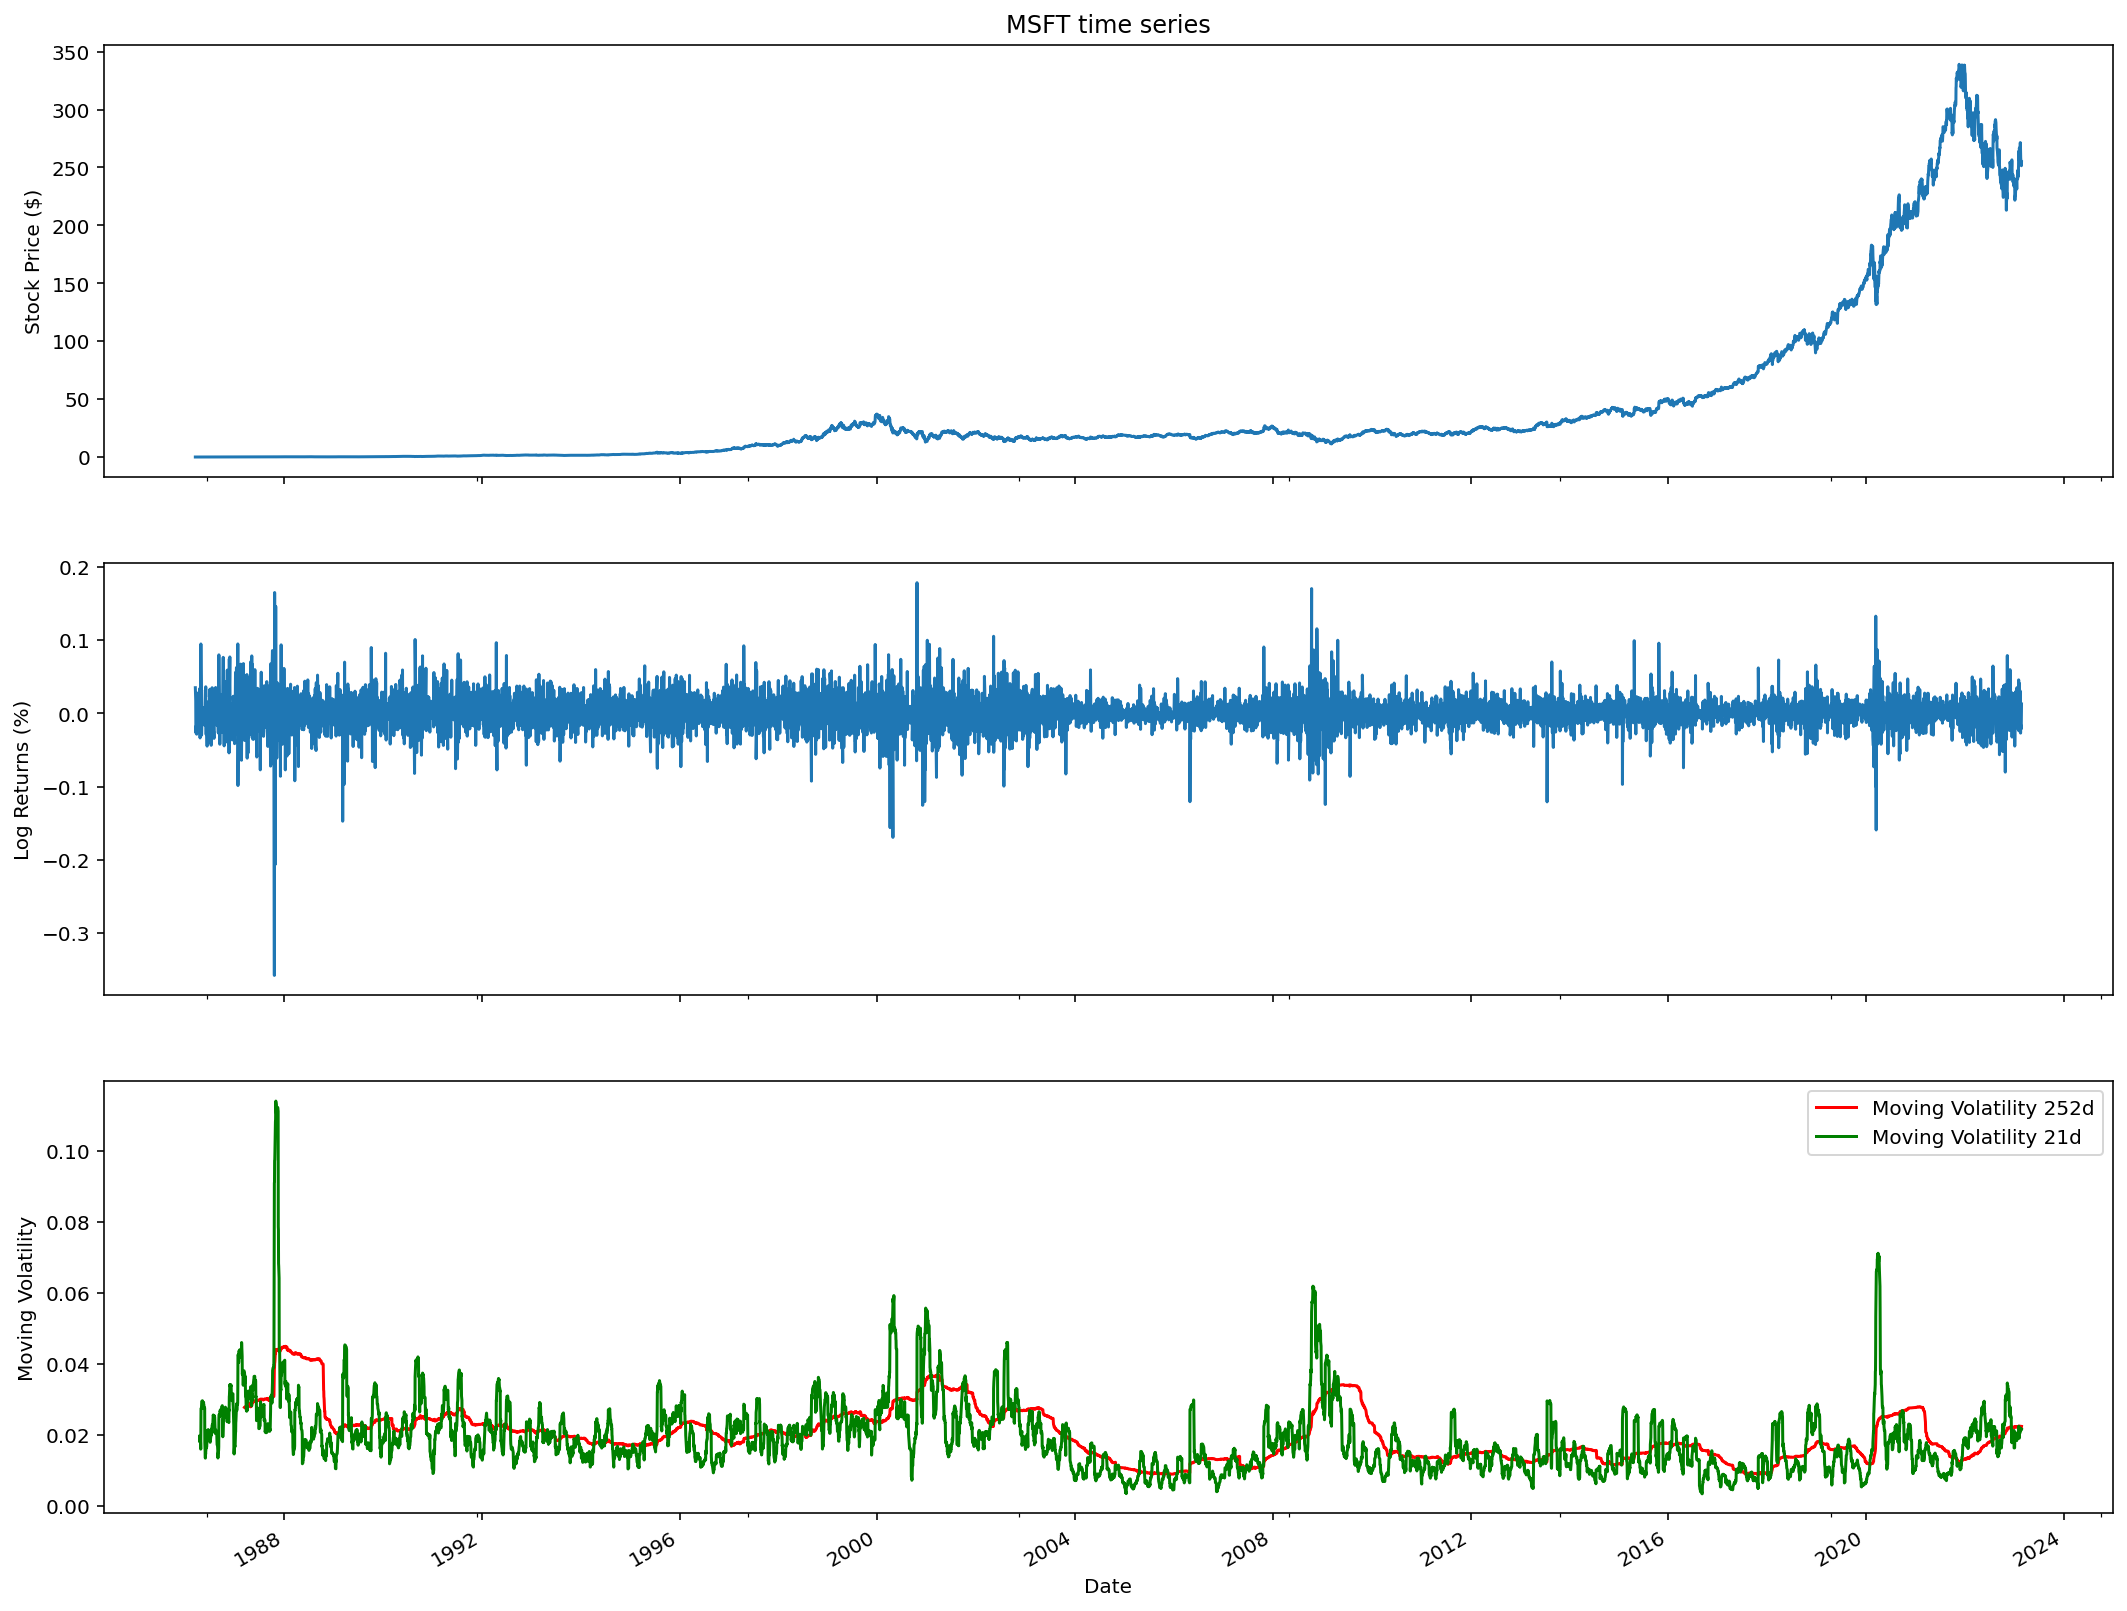

In [66]:
#plot the series
fig, ax = plt.subplots(3, 1, figsize=(18, 15), sharex=True)

MSFT.adj_close.plot(ax=ax[0])
ax[0].set(title='MSFT time series',ylabel='Stock Price ($)')

MSFT.log_return.plot(ax=ax[1])
ax[1].set(ylabel='Log Returns (%)')

MSFT.moving_std_252.plot(ax=ax[2], color='r', label='Moving Volatility 252d')
MSFT.moving_std_21.plot(ax=ax[2], color='g', label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',xlabel='Date')
ax[2].legend()

- Most measures of an asset's volatility are **negatively correlated** with its returns.
- <u>increased volatility</u> when the prices↓ and <u>decreased volatility</u> when they are rising↑.

#### Another Way to Visualize Leverage Effect: VIX (CBOE Volatility Index)
- use Option prices of S&P500 index


In [67]:
VIX = yf.download(['^GSPC', '^VIX'], start='1985-01-01', end='2020-12-31',progress=False)
VIX = VIX[['Adj Close']]
VIX.columns = VIX.columns.droplevel(0)
VIX = VIX.rename(columns={'^GSPC': 'sp500', '^VIX': 'vix'})

In [68]:
VIX.head()

sp500  vix
Date                       
1985-01-02  165.369995  NaN
1985-01-03  164.570007  NaN
1985-01-04  163.679993  NaN
1985-01-07  164.240005  NaN
1985-01-08  163.990005  NaN

In [69]:
#calculate the log returns
VIX['log_return'] = np.log(VIX.sp500 / VIX.sp500.shift(1))
VIX['vol_return'] = np.log(VIX.vix / VIX.vix.shift(1))
VIX.dropna(how='any', axis=0, inplace=True)

[Text(0.5, 1.0, 'S&P 500 vs. VIX ($\\rho$ = -0.71)'),
 Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'S&P 500 log returns')]

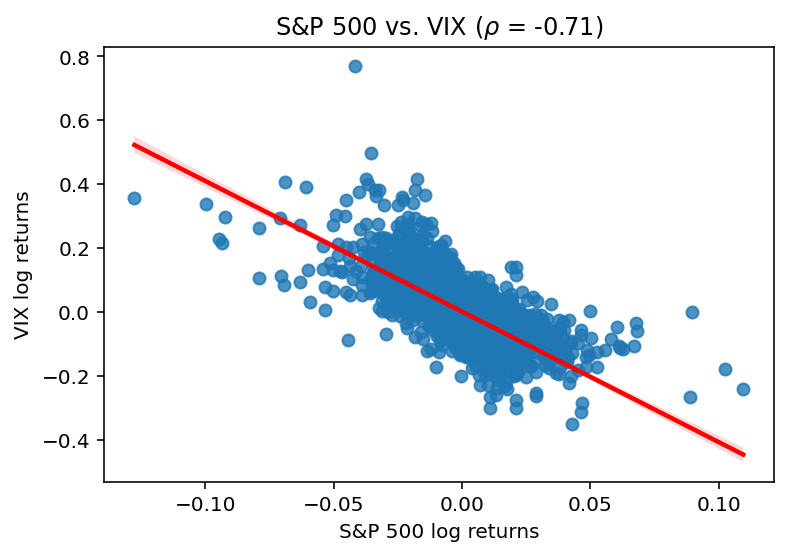

In [73]:
#regression 
rho = VIX.log_return.corr(VIX.vol_return)
ax = sns.regplot(x='log_return', y='vol_return', data=VIX, line_kws={'color': 'red'})
ax.set(title=f'S&P 500 vs. VIX ($\\rho$ = {rho:.2f})',ylabel='VIX log returns',xlabel='S&P 500 log returns')

Negative slope of the regression line and a strong negative correlation between the two series. Hence, the leverage effect of returns exists.